###  Basic Environment Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import gym

In [2]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name':'4x4',
           'is_slippery':False}
)

In [3]:
env = gym.make('FrozenLake-v3')

In [4]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [7]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [36]:
np.random.randn(1, 4) + np.array([10,10,10,10])

array([[10.50687968,  9.96719824,  9.97076892,  8.94142482]])

In [111]:
dis = 0.99
num_episodes =2000
rList=[]

In [112]:
for i in range(num_episodes):
    state=env.reset()
    rAll=0
    done=False
    while not done:
        action= np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n)/(i+1)) # wih noise
        new_state, reward, done, _= env.step(action)
        Q[state,action] = reward + dis*np.max(Q[new_state,:]) # new_state와 state 차이를 잘 구별해라 !!!! 
        rAll +=reward
        state = new_state
    rList.append(rAll) 
sum(rList)/num_episodes # success rate 

0.985

In [59]:
Q

array([[0.        , 0.        , 0.95099005, 0.        ],
       [0.        , 0.        , 0.96059601, 0.        ],
       [0.95099005, 0.970299  , 0.        , 0.96059601],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9801    , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99      , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.99      , 0.        ],
       [0.9801    , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

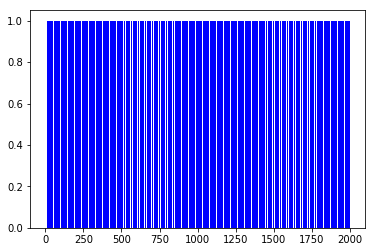

In [60]:
plt.bar(range(len(rList)), rList, color='blue')
plt.show()

In [61]:
len(rList)

2000

### Implementation !


In [152]:
# SFFF
# FHFH
# FFFH
# HFFG

# 위 그림의 STATE를 
# 0 1 2 3 
# 4 5 6 7 
# 8 9 10 11 
# 12 13 14 15  으로 메기겠음

In [153]:
Q = np.zeros([16,4])

In [154]:
num_episode = 2000
dis=0.9
rList=[]

In [155]:
for i in range(num_episode):
    state = 0
    done = False
    reward=0
    
    while not done:
        action = np.argmax(Q[state,:] + np.random.randn(1, 4)/(i+1))
        if action ==0 : # 왼쪽
            new_state = state -1
        elif action==1: # 오른쪽
            new_state = state +1
        elif action ==2: # 위
            new_state = state -4
        else : # 아래 
            new_state = state+4
        if new_state <0 or new_state >15 or new_state ==5 or new_state ==7 or new_state == 11 or new_state ==12:
            break

        if new_state == 15:
            reward=1
            done = True

        Q[state,action] = reward + dis * np.max(Q[new_state,:])
        state = new_state
    
    rList.append(reward)
    
sum(rList)/num_episode

0.8495

In [156]:
Q

array([[0.     , 0.     , 0.     , 0.59049],
       [0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.6561 ],
       [0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.729  , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.81   ],
       [0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.9    , 0.     , 0.     ],
       [0.     , 1.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     ]])

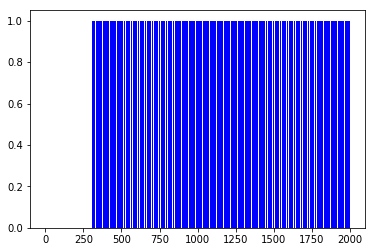

In [157]:
plt.bar(range(len(rList)) , rList, color='blue')
plt.show()

In [ ]:
 # 약 260번째 시도부터 거의 학습이 완성됐음을 알 수 있다. 